<a href="https://colab.research.google.com/github/seremmartin64-ops/ML/blob/main/MLClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Unsupervised Machine Learning
This type of learning the model is trained on data that does not have labelled responses.The main is to uncover hidden patterns, structures or relationships within the data.

## Types of Unsupervised Learning
1. Clustering
The GOAL is to Group similar Data Points together based on their similar features. E,g Safaricom Customers have been grouped into:

a) SMS Services: Send Promotional SMS updates that only target these customers.

b) Call Services

c) Bundles Subscribers

Clustering using the Following Algorithms:
1. K-Means: Where the groupings is done based on similarities of the Mean e,g Mean Age. This ONLY work on Numerical Data.

2. K-Mode: Grouped based on Categorical data e,g Gender, Location...

3. K-Prototype: Grouping is done based on BOTH Numerical(Mean) and Categorical(Mode)

Applications of Clustering Include:
1. Marget/Customer Segmentation.
2. Image Segmentation
3. Social Network Analyis


2. Association Rule Mining:
Checking relationship between Variables using a concepts called Basket Analysis.

In [ ]:
# CLUSTERING USING K-MEANS ALGORITHM
# CUSTOMER SEGMENTATION
# UNSUPERVISED LEARNING

In [ ]:
import kagglehub
import os
# Download latest version
path = kagglehub.dataset_download("shwetabh123/mall-customers")
print(path)
print(os.listdir(path))

Using Colab cache for faster access to the 'mall-customers' dataset.
/kaggle/input/mall-customers
['Mall_Customers.csv']


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
file_path = os.path.join(path, 'Mall_Customers.csv')
data = pd.read_csv(file_path)
data

NameError: name 'os' is not defined

In [ ]:
# stats
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


In [ ]:
df.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# Checking Missing Values
df.isnull().sum()
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income,0
Spending Score,0


In [ ]:
# Get a subset to include Age, Income, Spending
subset = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [ ]:
# MACHINE LEARNING
# STEP1: GET THE X
array = subset.values
X = array[:, :]
X

array([[ 19,  15,  39],
       [ 21,  15,  81],
       [ 20,  16,   6],
       [ 23,  16,  77],
       [ 31,  17,  40],
       [ 22,  17,  76],
       [ 35,  18,   6],
       [ 23,  18,  94],
       [ 64,  19,   3],
       [ 30,  19,  72],
       [ 67,  19,  14],
       [ 35,  19,  99],
       [ 58,  20,  15],
       [ 24,  20,  77],
       [ 37,  20,  13],
       [ 22,  20,  79],
       [ 35,  21,  35],
       [ 20,  21,  66],
       [ 52,  23,  29],
       [ 35,  23,  98],
       [ 35,  24,  35],
       [ 25,  24,  73],
       [ 46,  25,   5],
       [ 31,  25,  73],
       [ 54,  28,  14],
       [ 29,  28,  82],
       [ 45,  28,  32],
       [ 35,  28,  61],
       [ 40,  29,  31],
       [ 23,  29,  87],
       [ 60,  30,   4],
       [ 21,  30,  73],
       [ 53,  33,   4],
       [ 18,  33,  92],
       [ 49,  33,  14],
       [ 21,  33,  81],
       [ 42,  34,  17],
       [ 30,  34,  73],
       [ 36,  37,  26],
       [ 20,  37,  75],
       [ 65,  38,  35],
       [ 24,  38

In [ ]:
# STEP2: GET THE MODEL AND FIT THE DATA X
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
model = KMeans(n_clusters=5, random_state=42)
model.fit(X)

KMeans(n_clusters=5, random_state=42)

In [ ]:
# STEP3: GETTING THE CLUSTER CENTERS(CENTRONOIDS)
centroids = model.cluster_centers_
clusters = pd.DataFrame(centroids, columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
clusters

,Age,Annual Income (k$),Spending Score (1-100)
0,46.213483,47.719101,41.797753
1,32.454545,108.181818,82.727273
2,24.689655,29.586207,73.655172
3,40.394737,87.000000,18.631579
4,31.787879,76.090909,77.757576


### Step 6 - Interpret Results
- **Cluster 1:** High Income, High Spending → Premium Customers
- **Cluster 2:** Low Income, High Spending → Budget Lovers
- **Cluster 3:** High Income, Low Spending → Cautious Customers
- **Cluster 4:** Average Income/Spending → Standard Customers
- **Cluster 5:** Low Income, Low Spending → Low Value Customers

In [ ]:
# STEP4: GETTING THE CLUSTER MEMBERS
df['Group'] = model.labels_
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Group
0,1,Male,19,15,39,5
1,2,Male,21,15,81,4
2,3,Female,20,16,6,5
3,4,Female,23,16,77,4
4,5,Female,31,17,40,5


In [ ]:
# FILTER THE DATAFRAME BASED ON THE GROUP
# 1. Group 2 Members
condition = df['Group'] == 2
group2 = df[condition]
group2

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Group
123,124,Male,39,69,91,2
125,126,Female,31,70,77,2
127,128,Male,40,71,95,2
129,130,Male,38,71,75,2
131,132,Male,39,71,75,2
133,134,Female,31,72,71,2
135,136,Female,29,73,88,2
137,138,Male,32,73,73,2
139,140,Female,35,74,72,2
141,142,Male,32,75,93,2


In [ ]:
# 2. Group 3 Members
condition = df['Group'] == 3
group3 = df[condition]
group3.to_csv('group3.csv')

In [ ]:
# GETTING OPTIMAL NUMBER OF CLUSTERS
# ELBOW METHOD
# INAERIA
# We reached the Optimal Number, when the inertial is lower, Noramally near the Elbow Arm.
from sklearn.cluster import KMeans
inertias = []
for k in range(2, 15):
  model = KMeans(n_clusters=k, random_state=42)
  model.fit(X)
  inertias.append(model.inertia_)

print(inertias)

[198776.4942350334, 138212.1292948271, 99105.01037415837, 70552.75165103699, 54355.6250278347, 47360.08478360379, 43710.297751710656, 39360.43077812991, 36573.29811344328, 33121.29490020212, 30988.38460317461, 28329.682323842335, 27178.03089256356]


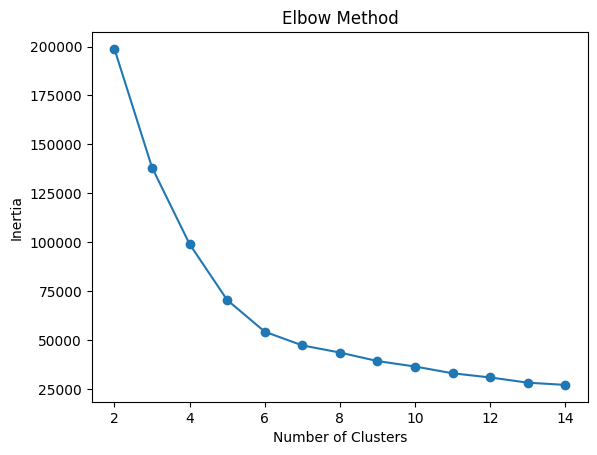

In [ ]:
# PLOT THE INERTIAS AS AN ELBOW
plt.plot(range(2, 15), inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()